<h1>Data Mining - Home Assignment 1</h1>

<h4>Group 5</h4>
<h5>Alberto Fallocco 59378<br>
Emanuele Tartaglione 61294<br>
Marcel Buczkowski 59426</h5> <br>
Time spent - 4 hours each

<h3>Loading and preprocessing data. Principal components analysis.<h3>

In [1]:
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

data_train = pd.read_csv('train.csv')
data_unique = pd.read_csv('unique_m.csv')

df = pd.merge(data_train, data_unique, left_index=True, right_index=True)
df = df.drop("material", axis = 1)


We have two datasets that correspond to each other that is why we decided to merge them into one big data frame. Before apllying any analysis onto it we had to drop 'material' column.
Next step was to perform Principal Component Analysis - PCA.

In [2]:
X = df.drop("critical_temp_y", axis = 1)
y = pd.DataFrame(df["critical_temp_y"])

random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

scaler = StandardScaler()
X_train_pca = pd.DataFrame(scaler.fit_transform(X_train))
y_train_pca = pd.DataFrame(scaler.fit_transform(y_train))

X_train.columns = X.columns
y_train.columns = y.columns

# Apply the PCA transformation on the data
pca = PCA(.80)
pca.fit(X_train_pca)
print(f'Number of components: {pca.n_components_}') 

tve=0
for i, ve in enumerate(pca.explained_variance_ratio_):
    tve+=ve
    if i == len(pca.explained_variance_ratio_) - 1:
        print("PC%d - Variance explained: %7.4f - Total Variance: %7.4f" % (i, ve, tve))
print()

Number of components: 48
PC47 - Variance explained:  0.0062 - Total Variance:  0.8024



We decided to apply PCA taht explain at least 80% of varaiance of the data. Above there are reults of this analysis, from which you can see that 80% of the variance is explained by total of 48 principal components.

In [3]:
X = data_train.drop("critical_temp", axis = 1)
y = pd.DataFrame(data_train["critical_temp"])

random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

scaler = StandardScaler()
X_train_pca = pd.DataFrame(scaler.fit_transform(X_train))
y_train_pca = pd.DataFrame(scaler.fit_transform(y_train))

X_train.columns = X.columns
y_train.columns = y.columns

pca = PCA(.90)

pca.fit(X_train_pca)
print(f'Number of components: {pca.n_components_}') 

tve=0
for i, ve in enumerate(pca.explained_variance_ratio_):
    tve+=ve
    if i == len(pca.explained_variance_ratio_) - 1:
        print("PC%d - Variance explained: %7.4f - Total Variance: %7.4f" % (i, ve, tve))
print()

Number of components: 12
PC11 - Variance explained:  0.0146 - Total Variance:  0.9089



We saw during our analysis that unique dataset is a sparse matrix which could affect the performance of PCA analysis so we then tried to use only train dataset. In this case since we have less data, we decided to increase the level of variance explained from 80% to 90%, which resulted in 12 principal components. Given this result, we decided to keep the "train" dataset only for the rest of our analysis. 

<h3>Decision tree regression model.</h3>
In the first part of our analysis we created two decision trees for regression: one for the full dataset and one for the dataset with a reduced feauture space.

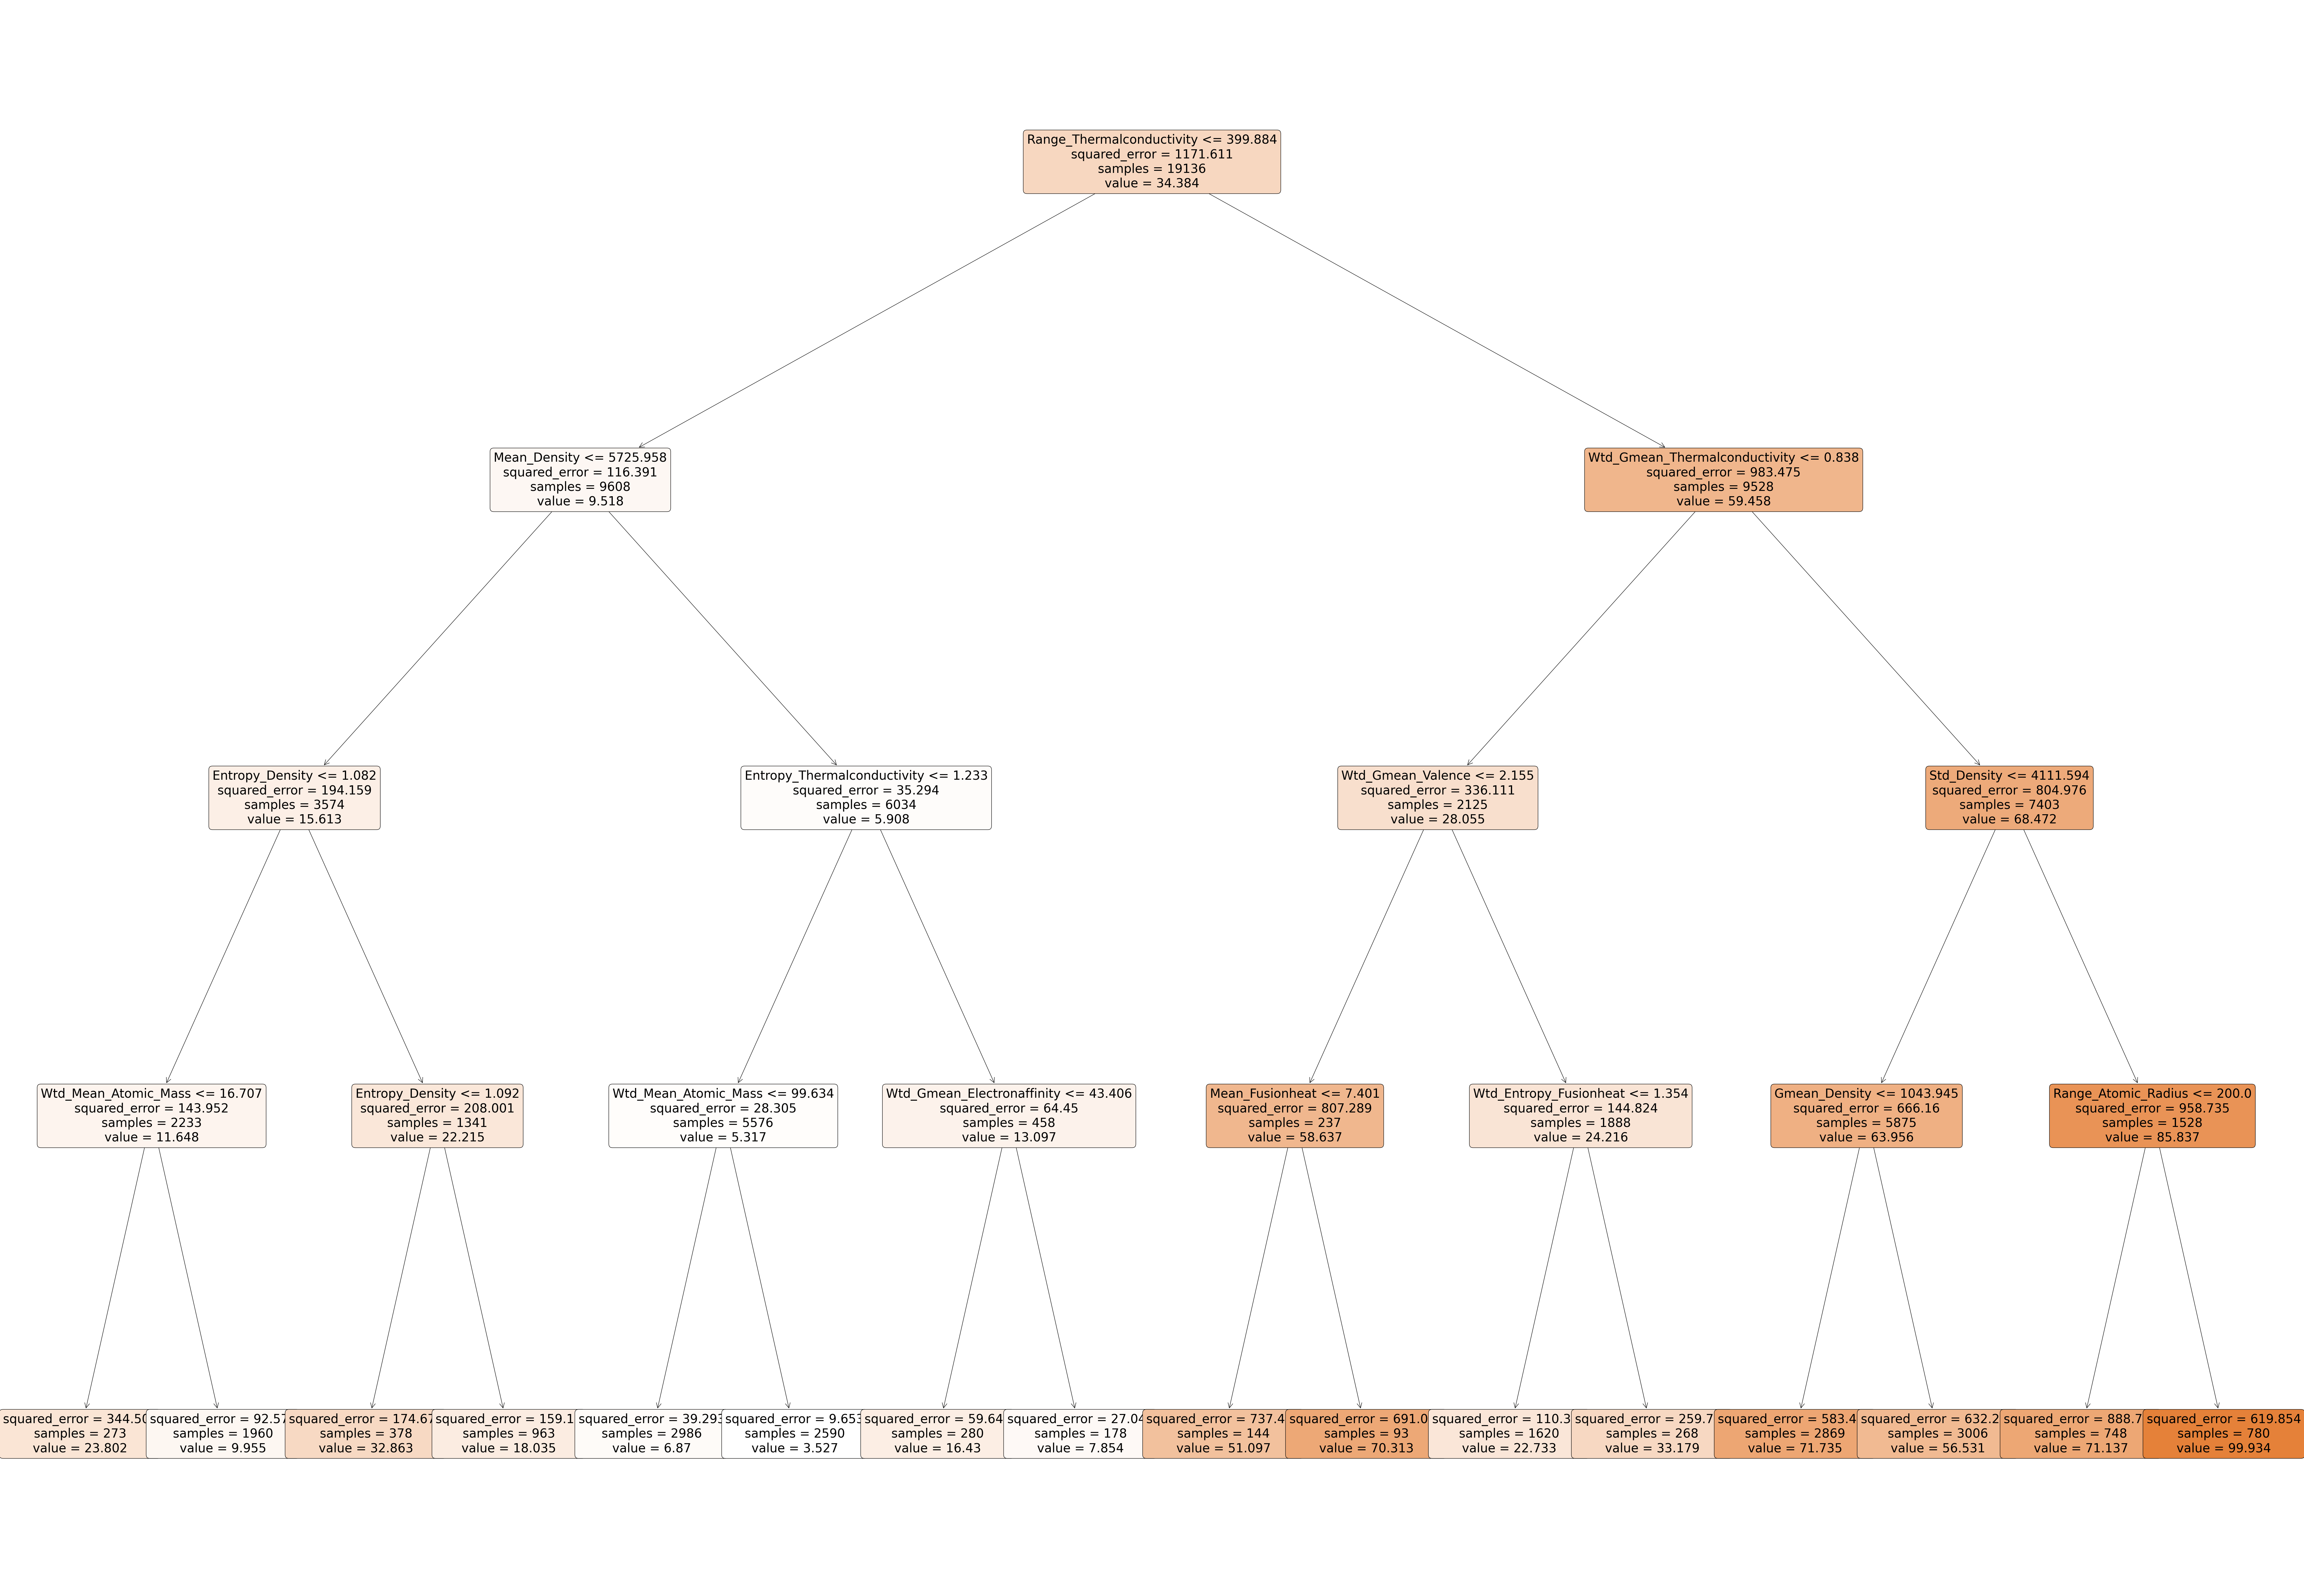

Mean Squared Error: 313.2618264471533


In [4]:
#decision tree regressor
model = tree.DecisionTreeRegressor(criterion= "squared_error", max_depth=4)
model.fit(X_train,y_train)

plt.figure(figsize=(100,70))
features = X_train.columns.str.title()
tree.plot_tree(model,fontsize=30, feature_names=features,
               filled=True, node_ids=False, rounded=True)
plt.show()

# Evaluate model on testing set using mean squared error (MSE)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

In [5]:
#Decision tree regressor with reduced space - Feature Selection: Backward Selection

# Create a linear regression model
model = LinearRegression()

# Perform backward selection
selector = RFE(model, n_features_to_select=10, step=1)
selector.fit(X_train, y_train)

# Print the selected features
selected_features = [i for i, x in enumerate(selector.support_) if x]
print("Selected Features indices: ", selected_features)
X_train_reduced = X_train.iloc[:, selected_features]
print(f"Selected feautures names: {list(X_train_reduced.columns)}")
X_test_reduced = X_test.iloc[:, selected_features]

model_reduced = tree.DecisionTreeRegressor(criterion= "squared_error", max_depth=4)
model_reduced.fit(X_train_reduced,y_train)

Selected Features indices:  [5, 6, 15, 16, 25, 36, 46, 55, 75, 80]
Selected feautures names: ['entropy_atomic_mass', 'wtd_entropy_atomic_mass', 'entropy_fie', 'wtd_entropy_fie', 'entropy_atomic_radius', 'wtd_entropy_Density', 'wtd_entropy_ElectronAffinity', 'entropy_FusionHeat', 'entropy_Valence', 'wtd_std_Valence']


DecisionTreeRegressor(max_depth=4)

To perform our analysis with reduced feauture space we used backwards selection to select only 10 variables. Our algorithm decided to choose the ones showed above.

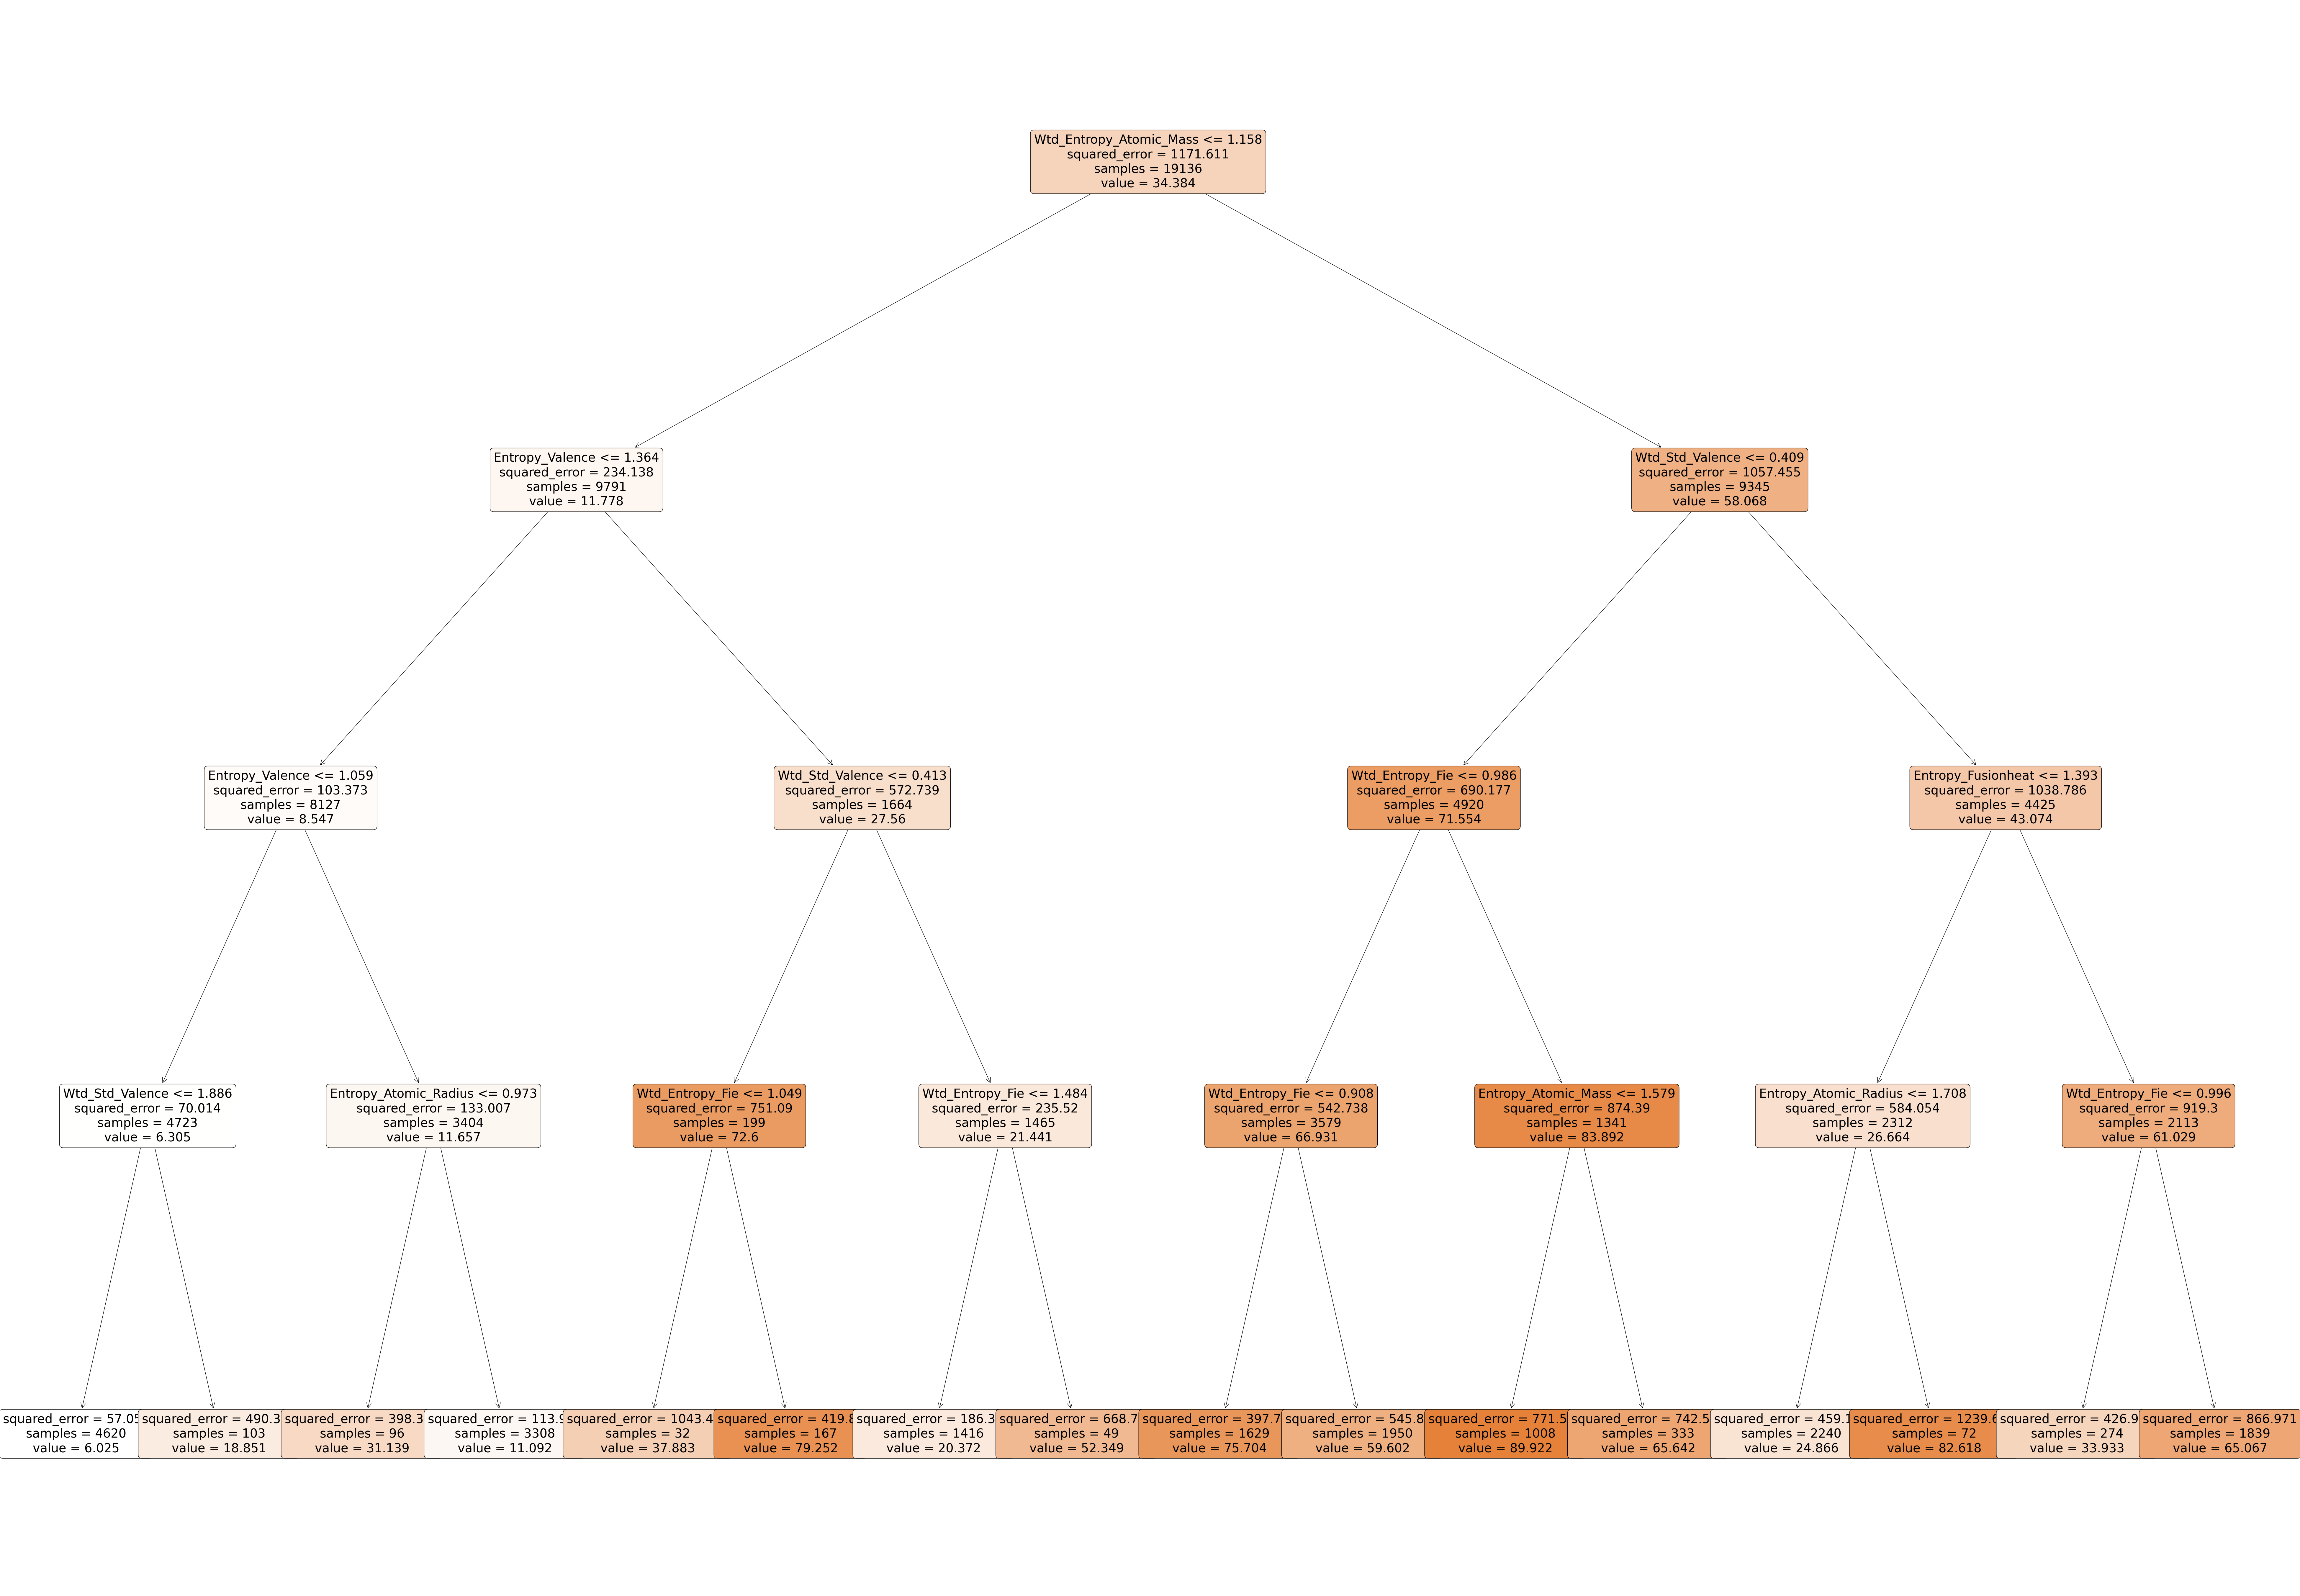

Mean Squared Error: 377.56377037387426


In [6]:
plt.figure(figsize=(100,70))
features_reduced = X_train_reduced.columns.str.title()
tree.plot_tree(model_reduced,fontsize=30, feature_names=features_reduced,
               filled=True, node_ids=False, rounded=True)
plt.show()

#Evaluation
y_pred = model_reduced.predict(X_test_reduced)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Given the two decision tree models, we then decided to compare them in order to see which one performed better. The full dataset has 81 feautures as opposed to the reduced one with only 10 feautures. Yet, the mean squared error of both models does not differ a lot (313 and 378 respectively). So we concluded that for further analysis it would be better to use the 10 features dataset.

<h3>Decision tree classification model.</h3>
The next step of our analysis was to create a classification model. We decided to use decision trees for classification.

In [7]:
#classification model with decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

y_train_class = y_train.copy()
for i in y_train_class.index:
    if y_train_class['critical_temp'][i] < 1:
        y_train_class['critical_temp'][i] = "VeryLow" 
    elif 1 <= y_train_class['critical_temp'][i] < 5:
        y_train_class['critical_temp'][i] = "Low" 
    elif 5 <= y_train_class['critical_temp'][i] < 20:
        y_train_class['critical_temp'][i] = "Medium"
    elif 20 <= y_train_class['critical_temp'][i] < 100:
        y_train_class['critical_temp'][i] = "High"
    else:
        y_train_class['critical_temp'][i] = "VeryHigh"

y_test_class = y_test.copy()
for i in y_test_class.index:
    if y_test_class['critical_temp'][i] < 1:
        y_test_class['critical_temp'][i] = "VeryLow" 
    elif 1 <= y_test_class['critical_temp'][i] < 5:
        y_test_class['critical_temp'][i] = "Low" 
    elif 5 <= y_test_class['critical_temp'][i] < 20:
        y_test_class['critical_temp'][i] = "Medium"
    elif 20 <= y_test_class['critical_temp'][i] < 100:
        y_test_class['critical_temp'][i] = "High"
    else:
        y_test_class['critical_temp'][i] = "VeryHigh"


model_class = tree.DecisionTreeClassifier(criterion= "entropy", max_depth = 4)

model_class.fit(X_train, y_train_class)

target_names = y_train_class['critical_temp'].unique()


The very first step was to assign different classes to our dependent variable as seen above. Then we pefromed analysis firstly for whole dataset with maximum depth of tree set as 4.

Accuracy is 68.68829337094499
[[819   3 125  28   0]
 [ 14 186 190   0   9]
 [114  90 365   0   5]
 [ 27   0   0  63   0]
 [  2  30  29   0  28]]


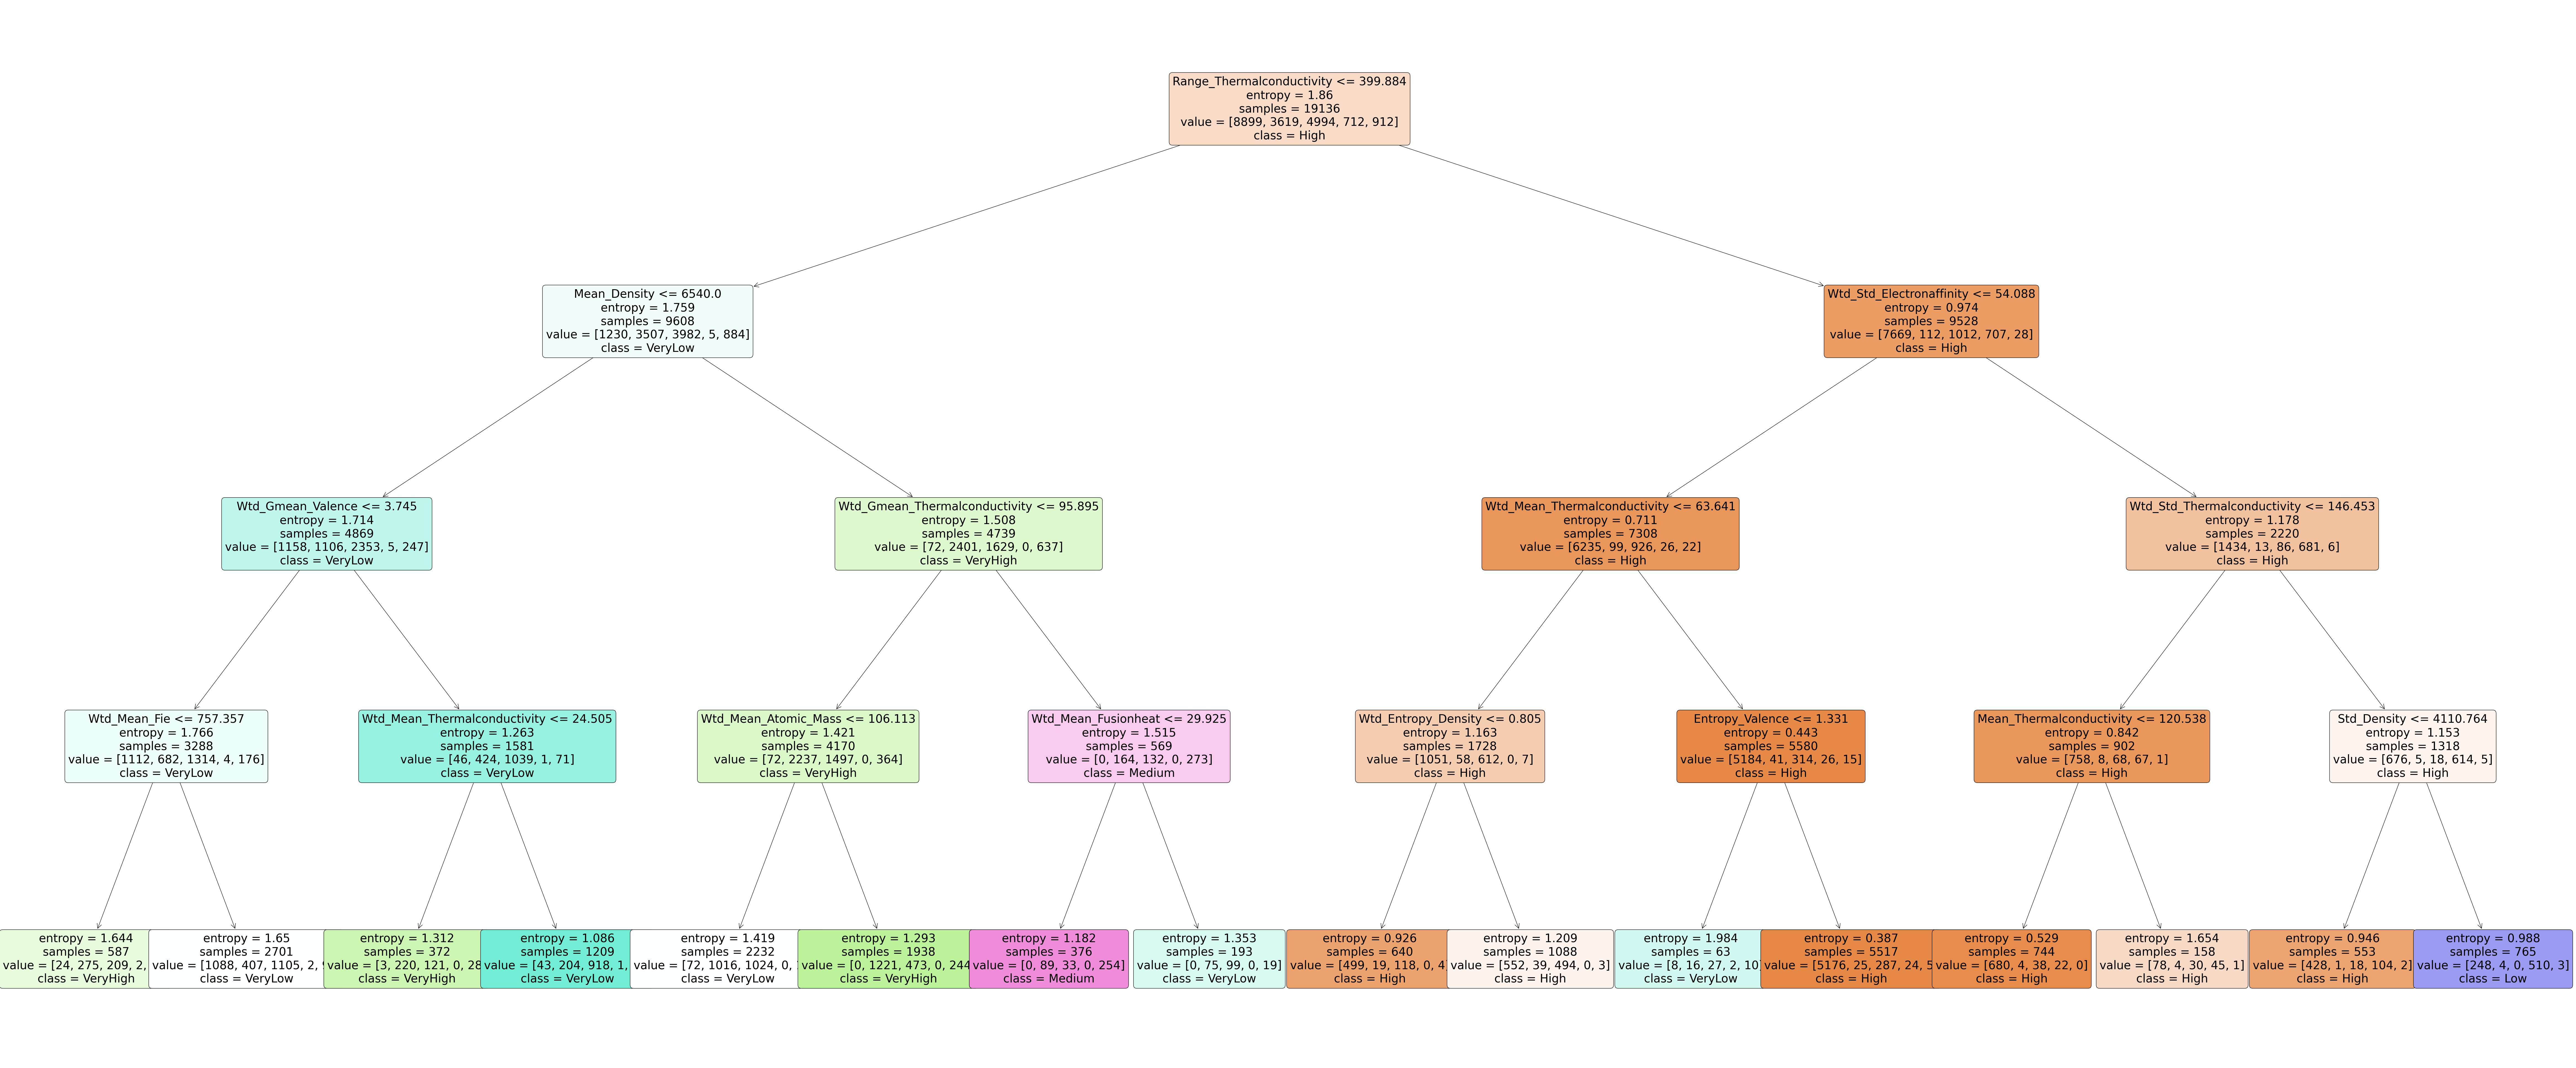

In [8]:
plt.figure(figsize=(120,50))
tree.plot_tree(model_class,fontsize=30, feature_names=features,
               class_names=target_names, filled=True, node_ids=False, rounded=True)

y_pred = model_class.predict(X_test)
print(("Accuracy is"), accuracy_score(y_test_class, y_pred) * 100)

confusion = confusion_matrix(y_test_class, y_pred)
print(confusion)

After validating the model we found that the accuracy score was 68.69%. We also decided to show the confusion matrix that represents how many objects were assigned to each class.

Above you can also see our classification tree. In order to read the tree you have to start from the parent node and then check whether the each value is higher or lower until you get to the node that does not have any childnodes. Then you can assign an object to the class.

Below we decided to plot the most important features. The most important one appears to be 'range_ThermalConductivity'.

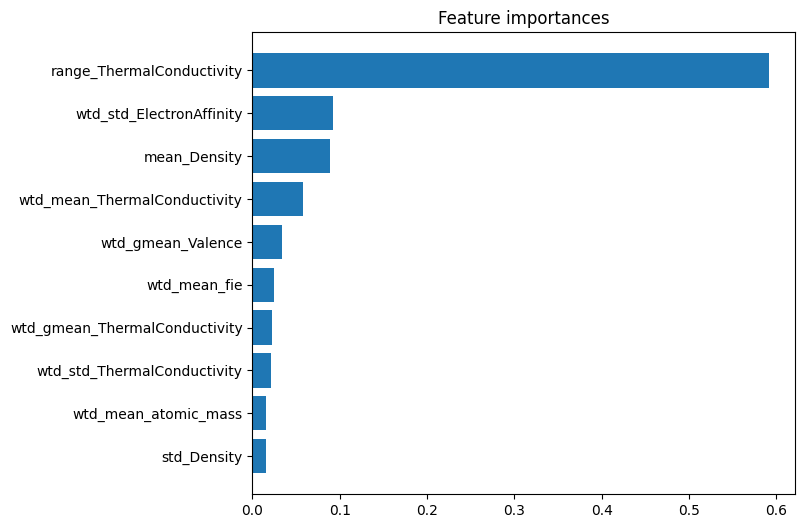

In [9]:
import numpy as np
importances = model_class.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(7,6))
plt.title("Feature importances")
plt.barh(X_train.columns[indices[:10][::-1]], importances[indices[:10][::-1]])
plt.show()

We then fitted the classification tree to the 10 features dataset. 

Accuracy is 62.717442407146216
[[864  13  89   9   0]
 [ 41 252 106   0   0]
 [156 218 200   0   0]
 [ 72   0   0  18   0]
 [  4  58  27   0   0]]


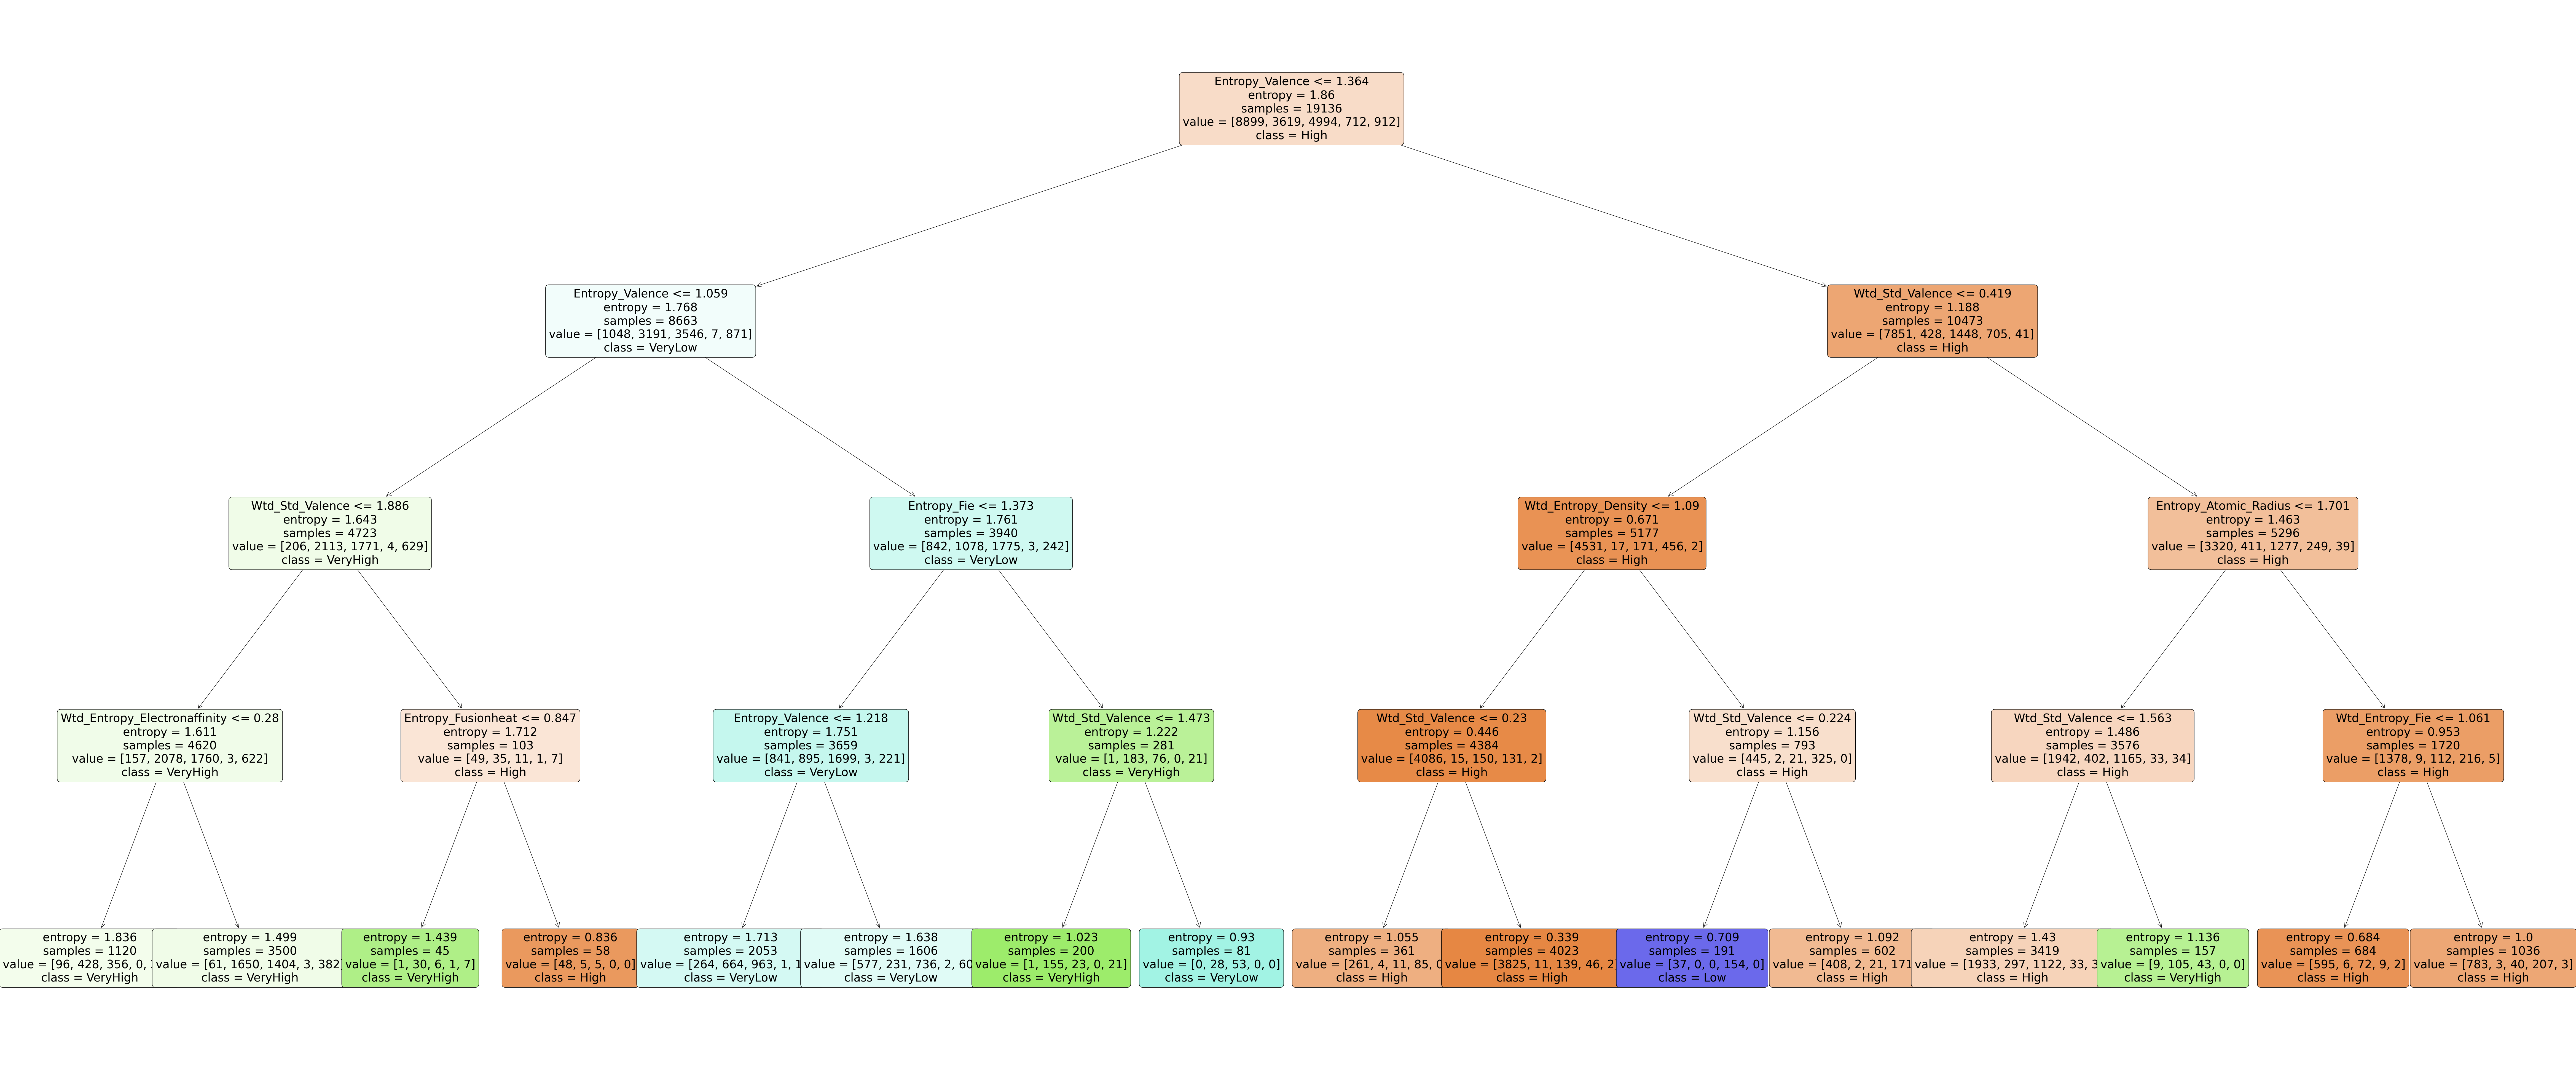

In [16]:

#CLASSIFICATION TREE with 10 features

model_class_reduced = tree.DecisionTreeClassifier(criterion= "entropy", max_depth=4)

model_class_reduced.fit(X_train_reduced,y_train_class)

plt.figure(figsize=(120,50))
tree.plot_tree(model_class_reduced,fontsize=30, feature_names=features_reduced,
               class_names=target_names, filled=True, node_ids=False, rounded=True)


X_test_reduced = X_test.iloc[:, selected_features]

y_pred_reduced = model_class_reduced.predict(X_test_reduced)
print(("Accuracy is"), accuracy_score(y_test_class, y_pred_reduced)*100)

confusion = confusion_matrix(y_test_class, y_pred_reduced)
print(confusion)

We can see again that even though for both models accuracy is far from desired, it is very similar even when model is created only based on 10 feautures. The accuracy of the model can be increased by increasing the depth of the tree, we decided to have a depth of four just for visualization matter.

Below on the plot you can see most important feautures for model based on reduced dataset, with the most important variable being 'wtd_range_atomic_mass'.

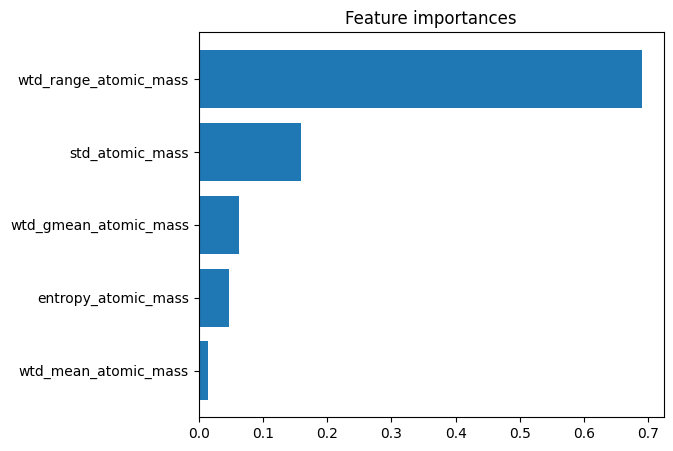

In [11]:
importances = model_class_reduced.feature_importances_
indices = np.argsort(importances)[::-1]

# plot the feature importances
plt.figure(figsize=(6,5))
plt.title("Feature importances")
plt.barh(X_train.columns[indices[:5][::-1]], importances[indices[:5][::-1]])
plt.show()

<h3>Naive Bayes classification model</h3>
The last step of our analysis was to create a Naive bayes classification model.

In [12]:
from sklearn.naive_bayes import GaussianNB
import numpy as np

# NAIVE BAYES
X_train_array = X_train.copy().to_numpy()
y_train_array =  y_train_class.copy().to_numpy().ravel()

gnb = GaussianNB()
model_NB = gnb.fit(X_train_array, y_train_array)

X_test_array = X_test.copy().to_numpy()

y_pred_NB = model_NB.predict(X_test_array)
y_pred_NB

confusion_NB = confusion_matrix(y_test_class, y_pred_NB)
print(confusion_NB)
print(("Accuracy is"), accuracy_score(y_test_class, y_pred_NB) * 100)


[[566   6  93 310   0]
 [ 25 179 104   1  90]
 [120 175 206  13  60]
 [  7   0   0  83   0]
 [  2  32  13   0  42]]
Accuracy is 50.587682181476254


In [13]:
## REDUCED NB

X_train_array_reduced = X_train_reduced.copy().to_numpy()

gnb_reduced = GaussianNB()
model_NB_reduced = gnb_reduced.fit(X_train_array_reduced, y_train_array)

X_test_array_reduced = X_test_reduced.copy().to_numpy()

y_pred_NB_reduced = model_NB_reduced.predict(X_test_array_reduced)
y_pred_NB_reduced

confusion_NB_reduced = confusion_matrix(y_test_class, y_pred_NB_reduced)
print(confusion_NB_reduced)
print(("Accuracy is"), accuracy_score(y_test_class, y_pred_NB_reduced) * 100)

[[690  32  14 230   9]
 [ 86  94  98   7 114]
 [214 140  86  17 117]
 [ 33   0   0  57   0]
 [ 10  20  18   0  41]]
Accuracy is 45.51010813352139


As seen above we performed Naive Bayes on both the full dataset and reduced one with only 10 selected feautures. We calculated confusion metrices and accuracy scores for both. Again the accuray score were very similar for both models, these being respectively 50.59 and 45.51, but as one may observe they are certainly not the best. In this case decision tree classifiers perform better, having higher accuracy score. 

In [14]:
y_test_class.groupby(['critical_temp'])['critical_temp'].count()

critical_temp
High        975
Low         399
Medium      574
VeryHigh     90
VeryLow      89
Name: critical_temp, dtype: int64

To conclude, we can say that we can make our model better considering a few things: firstly, it is possible to select the reduced feature space with other methods (forward selection or lasso, to name a few). Another important issue is that, as shown above, we are dealing with an imbalanced dataset. To solve this problem, methods as oversampling or undersampling can be viable options. In this way, the accuracy of our models should increase.